In [ ]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=66096e835f9258d981edb09f26938e1d87eb290d23c4a67e6322af80358146c2
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.1 MB/s eta 0:00:00


# I. Môi trường - Thư viện

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sbn

import warnings
warnings.filterwarnings('ignore') # tắt những cảnh báo
from statistics import mean

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score

from pyclustering.utils import timedcall
#from pyclustering.samples.definitions import SIMPLE_SAMPLES
#from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.cure import cure
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Machine Learning'

Mounted at /content/gdrive


# II. Áp dụng với dữ liệu thí nghiệm

## 1. Bộ dữ liệu

In [ ]:
data1 = pd.read_csv(folder + '/Data/balance.csv')
data2 = pd.read_csv(folder + '/Data/imbalance.csv')
data3 = pd.read_csv(folder + '/Data/line.csv')

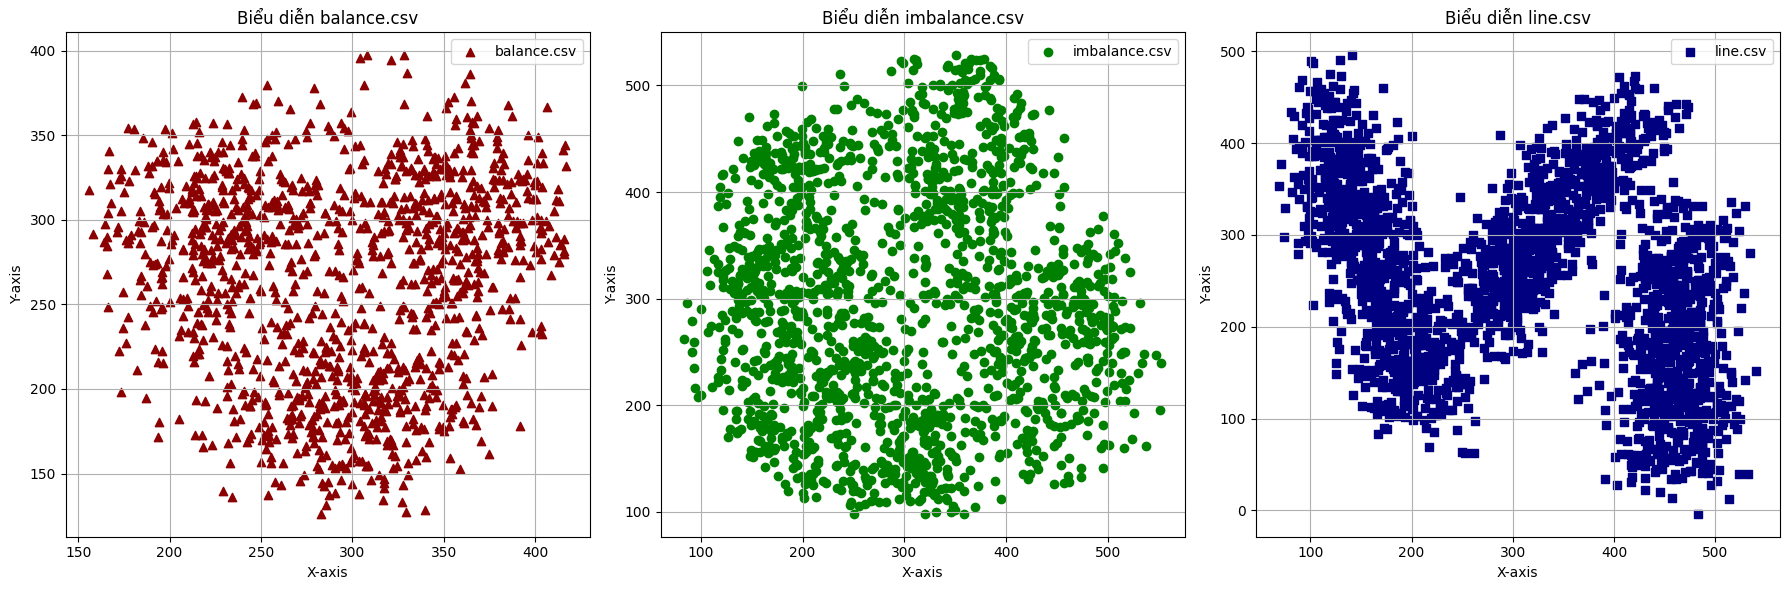

In [ ]:
colors = ['darkred', 'green', 'navy']
markers = ['^','o', 's']
labels = ['balance.csv', 'imbalance.csv', 'line.csv']
datasets = [data1, data2, data3]
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, data in enumerate(datasets):
    axs[i].scatter(data['x'], data['y'], color=colors[i], marker=markers[i], label=labels[i])
    axs[i].set_title(f'Biểu diễn {labels[i]}')
    axs[i].set_xlabel('X-axis')
    axs[i].set_ylabel('Y-axis')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

## 2. Thuật toán Cure

In [ ]:
def fix_input(dt):
  rec = dt.to_records(index=False)
  lst=[]
  for r in rec:
    lst.append(list(r))
  return lst

In [ ]:
def fix_output(clts):
  clt= {}
  for i,cl in enumerate(clts):
    for c in cl:
      clt[c]=i
  l=[]
  for i in range( len(clt)):
    l.append(clt[i])
  return l

In [ ]:

sample1 = fix_input(data1)
sample2 = fix_input(data2)
sample3 = fix_input(data3)

# Số lượng cụm nhóm đề ra
num_clusters = 3

# Áp dụng thuật toán CURE
cure_instance1 = cure(sample1, num_clusters)
cure_instance1.process()

cure_instance2 = cure(sample2, num_clusters)
cure_instance2.process()

cure_instance3 = cure(sample3, num_clusters)
cure_instance3.process()

# Lấy thông tin về các cụm
clusters1 = cure_instance1.get_clusters()
clusters2 = cure_instance2.get_clusters()
clusters3 = cure_instance3.get_clusters()


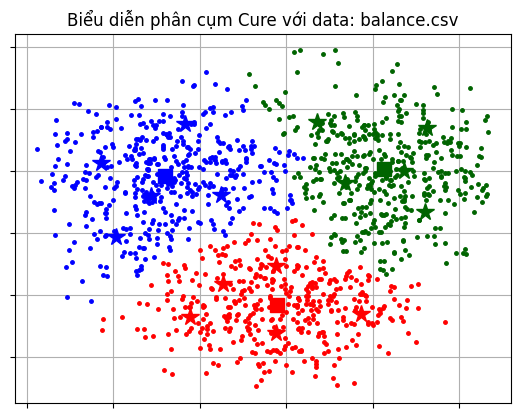

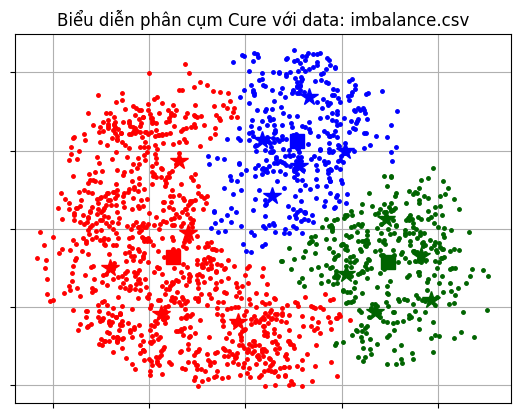

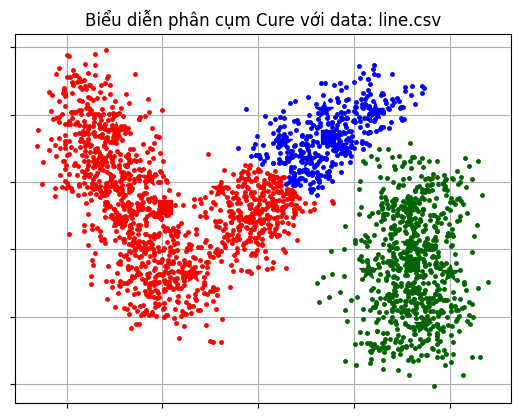

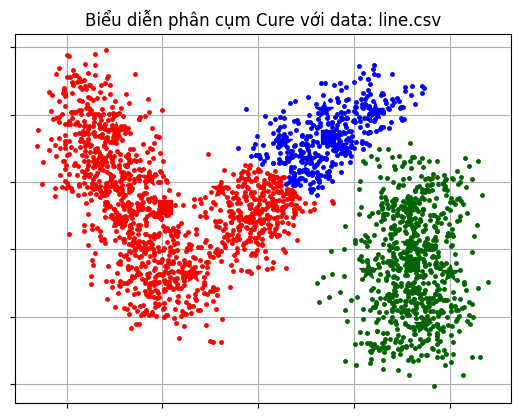

In [ ]:
# Biểu diễn phân cụm Cure
representors1 = cure_instance1.get_representors()
means1 = cure_instance1.get_means()
visualizer1 = cluster_visualizer()
visualizer1.append_clusters(clusters1, sample1)
for cluster_index in range(len(clusters1)):
  visualizer1.append_cluster_attribute(0, cluster_index, representors1[cluster_index], '*', 13)
  visualizer1.append_cluster_attribute(0, cluster_index, [ means1[cluster_index] ], 's',10 )
visualizer1.set_canvas_title('Biểu diễn phân cụm Cure với data: balance.csv')
visualizer1.show()

representors2 = cure_instance2.get_representors()
means2 = cure_instance2.get_means()
visualizer2 = cluster_visualizer()
visualizer2.append_clusters(clusters2, sample2)
for cluster_index in range(len(clusters2)):
  visualizer2.append_cluster_attribute(0, cluster_index, representors2[cluster_index], '*', 13)
  visualizer2.append_cluster_attribute(0, cluster_index, [ means2[cluster_index] ], 's',10 )
visualizer2.set_canvas_title('Biểu diễn phân cụm Cure với data: imbalance.csv')
visualizer2.show()

representors3 = cure_instance3.get_representors()
means3 = cure_instance3.get_means()
visualizer3 = cluster_visualizer()
visualizer3.append_clusters(clusters3, sample3)
for cluster_index in range(len(clusters3)):
  visualizer3.append_cluster_attribute(0, cluster_index, representors3[cluster_index], '*', 13)
  visualizer3.append_cluster_attribute(0, cluster_index, [ means3[cluster_index] ], 's',10 )
visualizer3.set_canvas_title('Biểu diễn phân cụm Cure với data: line.csv')
visualizer3.show()

In [ ]:
clusters1 = fix_output(clusters1)
clusters2 = fix_output(clusters2)
clusters3 = fix_output(clusters3)

In [ ]:
# Chỉ số Silhouette
score1 = silhouette_score(data1, clusters1)
print('Chỉ số silhouette của bộ dữ liệu balance.csv: ',score1)
score2 = silhouette_score(data2, clusters2)
print('Chỉ số silhouette của bộ dữ liệu imbalance.csv: ',score2)
score3 = silhouette_score(data3, clusters3)
print('Chỉ số silhouette của bộ dữ liệu line.csv: ',score3)

Chỉ số silhouette của bộ dữ liệu balance.csv:  0.48552761283657186
Chỉ số silhouette của bộ dữ liệu imbalance.csv:  0.3360710730055196
Chỉ số silhouette của bộ dữ liệu line.csv:  0.42104258189676924


In [ ]:
# Thời gian thực hiện thuật toán
(ticks1, _) = timedcall(cure_instance1.process)
print("Sample: balance  ", "\tExecution time: ", ticks1, "\n")
(ticks2, _) = timedcall(cure_instance2.process)
print("Sample: imbalance", "\tExecution time: ", ticks2, "\n")
(ticks3, _) = timedcall(cure_instance3.process)
print("Sample: line     ", "\tExecution time: ", ticks3, "\n")

Sample: balance   	Execution time:  0.14983599700002515 

Sample: imbalance 	Execution time:  0.24077949000002263 

Sample: line      	Execution time:  0.4326560719999861 



## 3. Các phương pháp truyền thống

### Kmeans

In [ ]:
# Function to perform KMeans clustering and print the cluster labels
def KMeans_cluster(df):
    X = df.values  # Assuming all columns in the DataFrame are features
    start_time = time.time()

    y_pred = KMeans(n_clusters=3).fit_predict(X)

    end_time = time.time()
    print("Runtime:", end_time - start_time, "seconds")
    silhouette_avg = silhouette_score(X, y_pred)
    print("Silhouette Score:", silhouette_avg)

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolors='k')
    plt.title('Kmeans Clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


Balance dataset:
Runtime: 0.3163943290710449 seconds
Silhouette Score: 0.4937370111836321


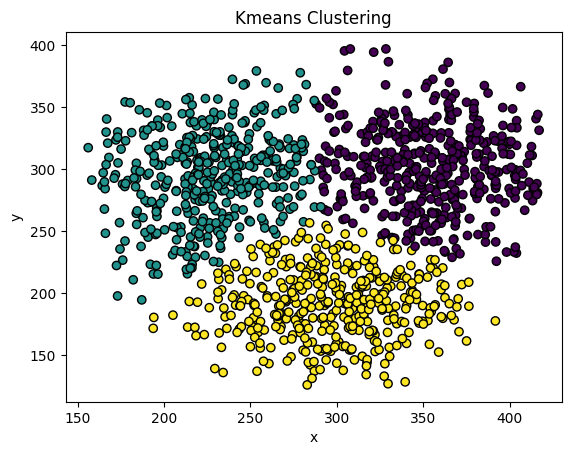

In [ ]:
print("Balance dataset:")
KMeans_cluster(data1)

Imbalance dataset:
Runtime: 1.4307990074157715 seconds
Silhouette Score: 0.41283985988390726


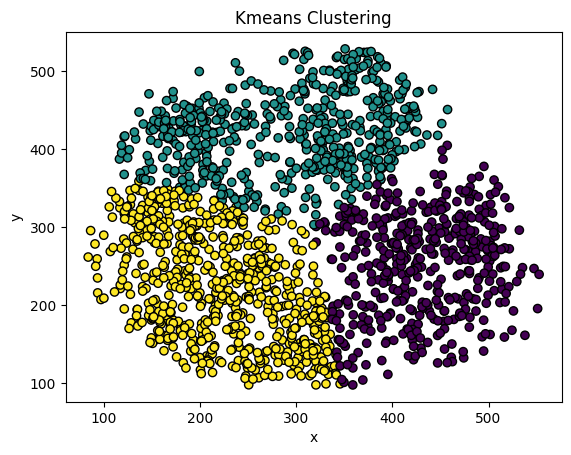

In [ ]:
print("Imbalance dataset:")
KMeans_cluster(data2)

For Line dataset:
Runtime: 0.15449833869934082 seconds
Silhouette Score: 0.4549622905031447


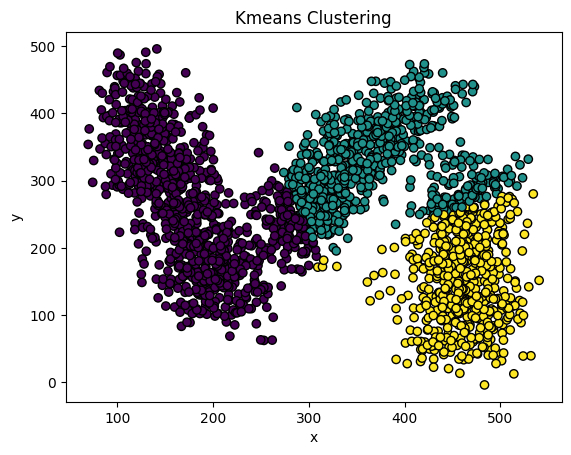

In [ ]:
print("For Line dataset:")
KMeans_cluster(data3)

### HAC

In [ ]:
# Function to perform Hierarchical Agglomerative Clustering (HAC) and print the cluster labels
def HAC_cluster(df, n_clusters):
    X = df.values  # Assuming all columns in the DataFrame are features
    start_time = time.time()

    hac = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hac.fit_predict(X)

    end_time = time.time()

    print("Runtime:", end_time - start_time, "seconds")
    silhouette_avg = silhouette_score(X, y_pred)
    print("Silhouette Coefficient:", silhouette_avg)

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolors='k')
    plt.title('HAC Clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()




Balance dataset:
Runtime: 0.06659984588623047 seconds
Silhouette Coefficient: 0.46926921169752606


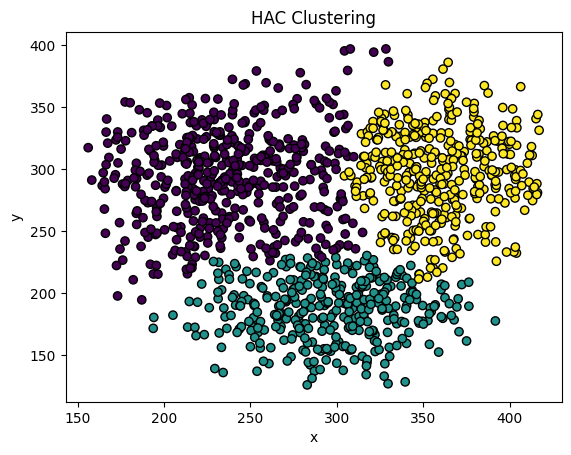

In [ ]:
# Assuming 'df_balance' is your DataFrame
print("Balance dataset:")
HAC_cluster(data1, 3)  # Replace '3' with the desired number of clusters

Imbalance dataset:
Runtime: 0.10384845733642578 seconds
Silhouette Coefficient: 0.34282494119231227


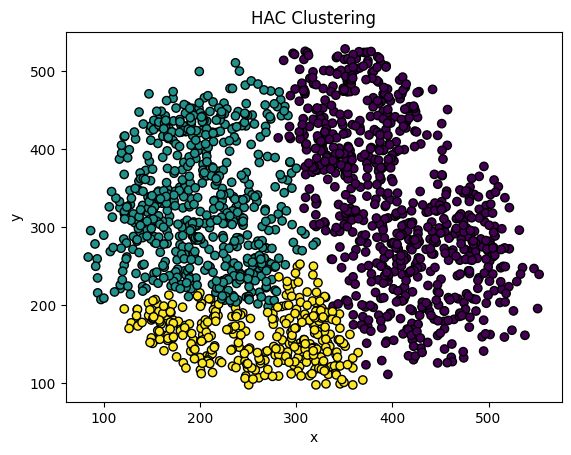

In [ ]:
print("Imbalance dataset:")
HAC_cluster(data2, 3)

For line dataset:
Runtime: 0.1623246669769287 seconds
Silhouette Coefficient: 0.41752347101747317


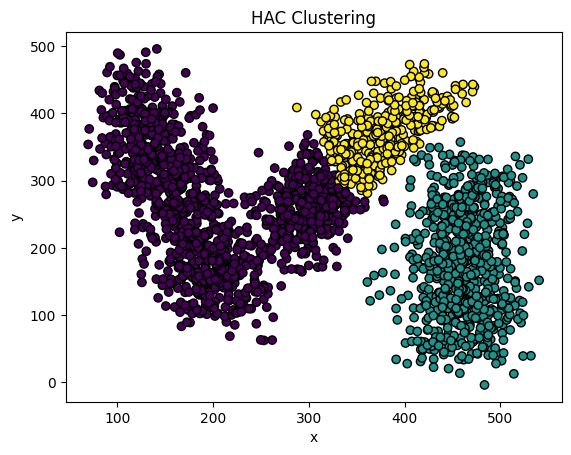

In [ ]:
print("For line dataset:")
HAC_cluster(data3, 3)

## 4. Các phương pháp khác

### BIRCH

In [ ]:
def BIRCH_cluster(df):
    X = df[['x', 'y']].values

    start_time = time.time()

    y_pred = Birch(n_clusters=3).fit_predict(X)

    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution Time:", execution_time, "seconds")

    silhouette_avg = silhouette_score(X, y_pred)
    print("Silhouette Score:", silhouette_avg)

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolors='k')
    plt.title('Birch Clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Balance dataset:
Execution Time: 0.17492318153381348 seconds
Silhouette Score: 0.47748446211159007


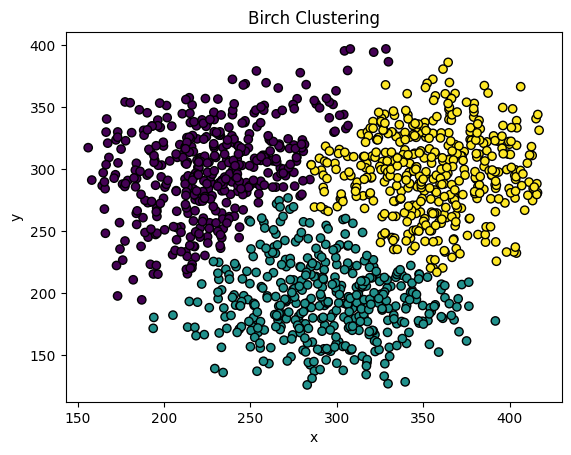

In [ ]:
# Load and process each dataset
print("Balance dataset:")
BIRCH_cluster(data1)


Imbalance dataset:
Execution Time: 0.3473703861236572 seconds
Silhouette Score: 0.3428688169276944


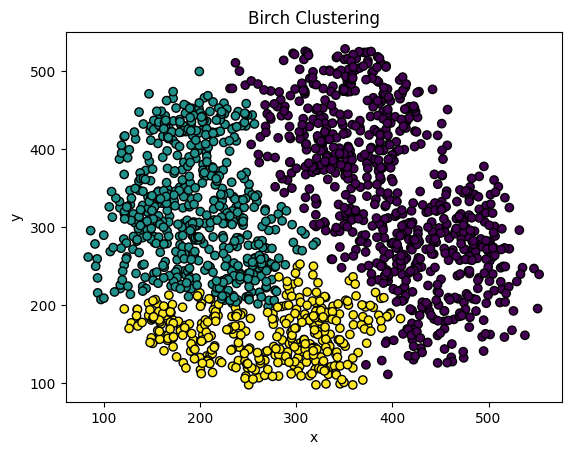

In [ ]:
print("Imbalance dataset:")
BIRCH_cluster(data2)



For Line dataset:
Execution Time: 0.31829023361206055 seconds
Silhouette Score: 0.4158730071056957


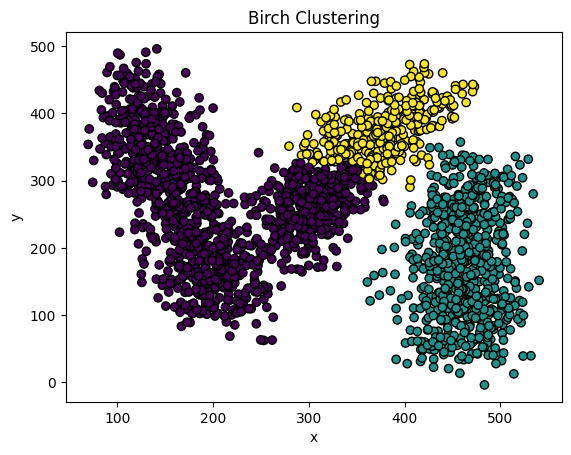

In [ ]:
print("For Line dataset:")
BIRCH_cluster(data3)

### DBSCAN

In [ ]:
def DBSCAN_cluster(df, eps=20, min_samples=25):
    X = df[['x', 'y']].values

    start_time = time.time()

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)

    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution Time:", execution_time, "seconds")

    silhouette_avg = silhouette_score(X, y_pred)
    print("Silhouette Coefficient:", silhouette_avg)

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolors='k')
    plt.title('DBSCAN Clustering')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Balance dataset:
Execution Time: 0.01374053955078125 seconds
Silhouette Coefficient: 0.3943204384684333


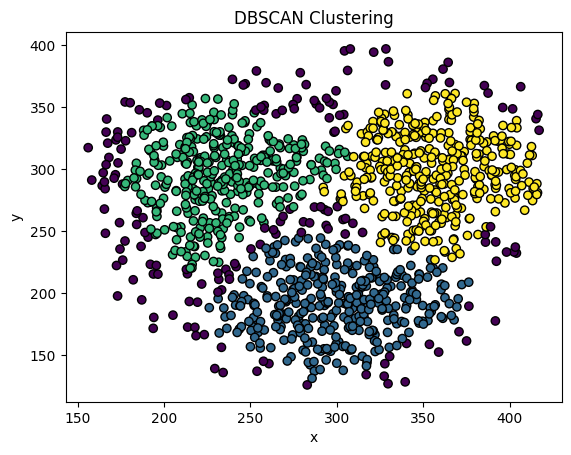

In [ ]:
print("Balance dataset:")
DBSCAN_cluster(data1, 18, 28)

Imalance dataset:
Execution Time: 0.014050483703613281 seconds
Silhouette Coefficient: 0.26210915652552863


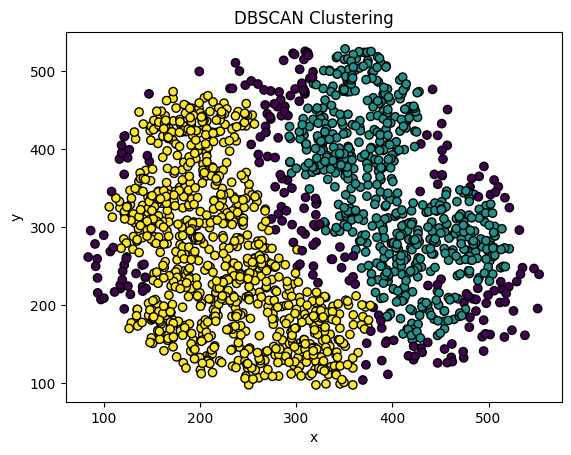

In [ ]:
print("Imalance dataset:")
DBSCAN_cluster(data2, 22, 19)


Line dataset:
Execution Time: 0.028955936431884766 seconds
Silhouette Coefficient: 0.35637616617461687


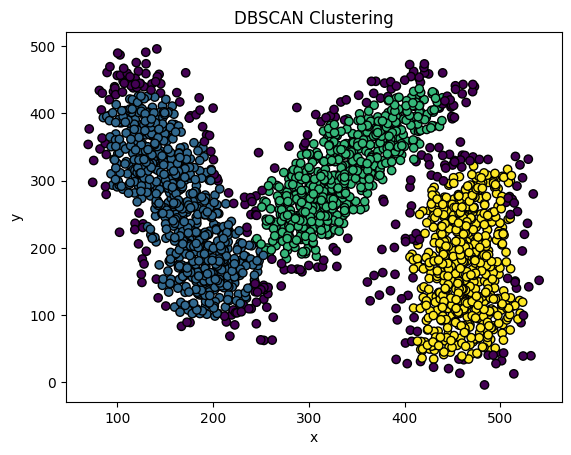

In [ ]:
print("Line dataset:")
DBSCAN_cluster(data3,20, 25)

# II. Áp dụng với dữ liệu thực tế

## 1. Bộ dữ liệu Seed Data

In [ ]:
df= pd.read_csv(folder + '/Data/Seed_Data.csv')

In [ ]:
data=df.drop(['target'], axis=1)

Kiểm tra dữ liệu bị thiếu

In [ ]:
# Xem tỷ lệ dữ liệu thiếu trong từng cột
missing_values = df.isnull().sum()
print(missing_values)

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64


Trực quan dữ liệu

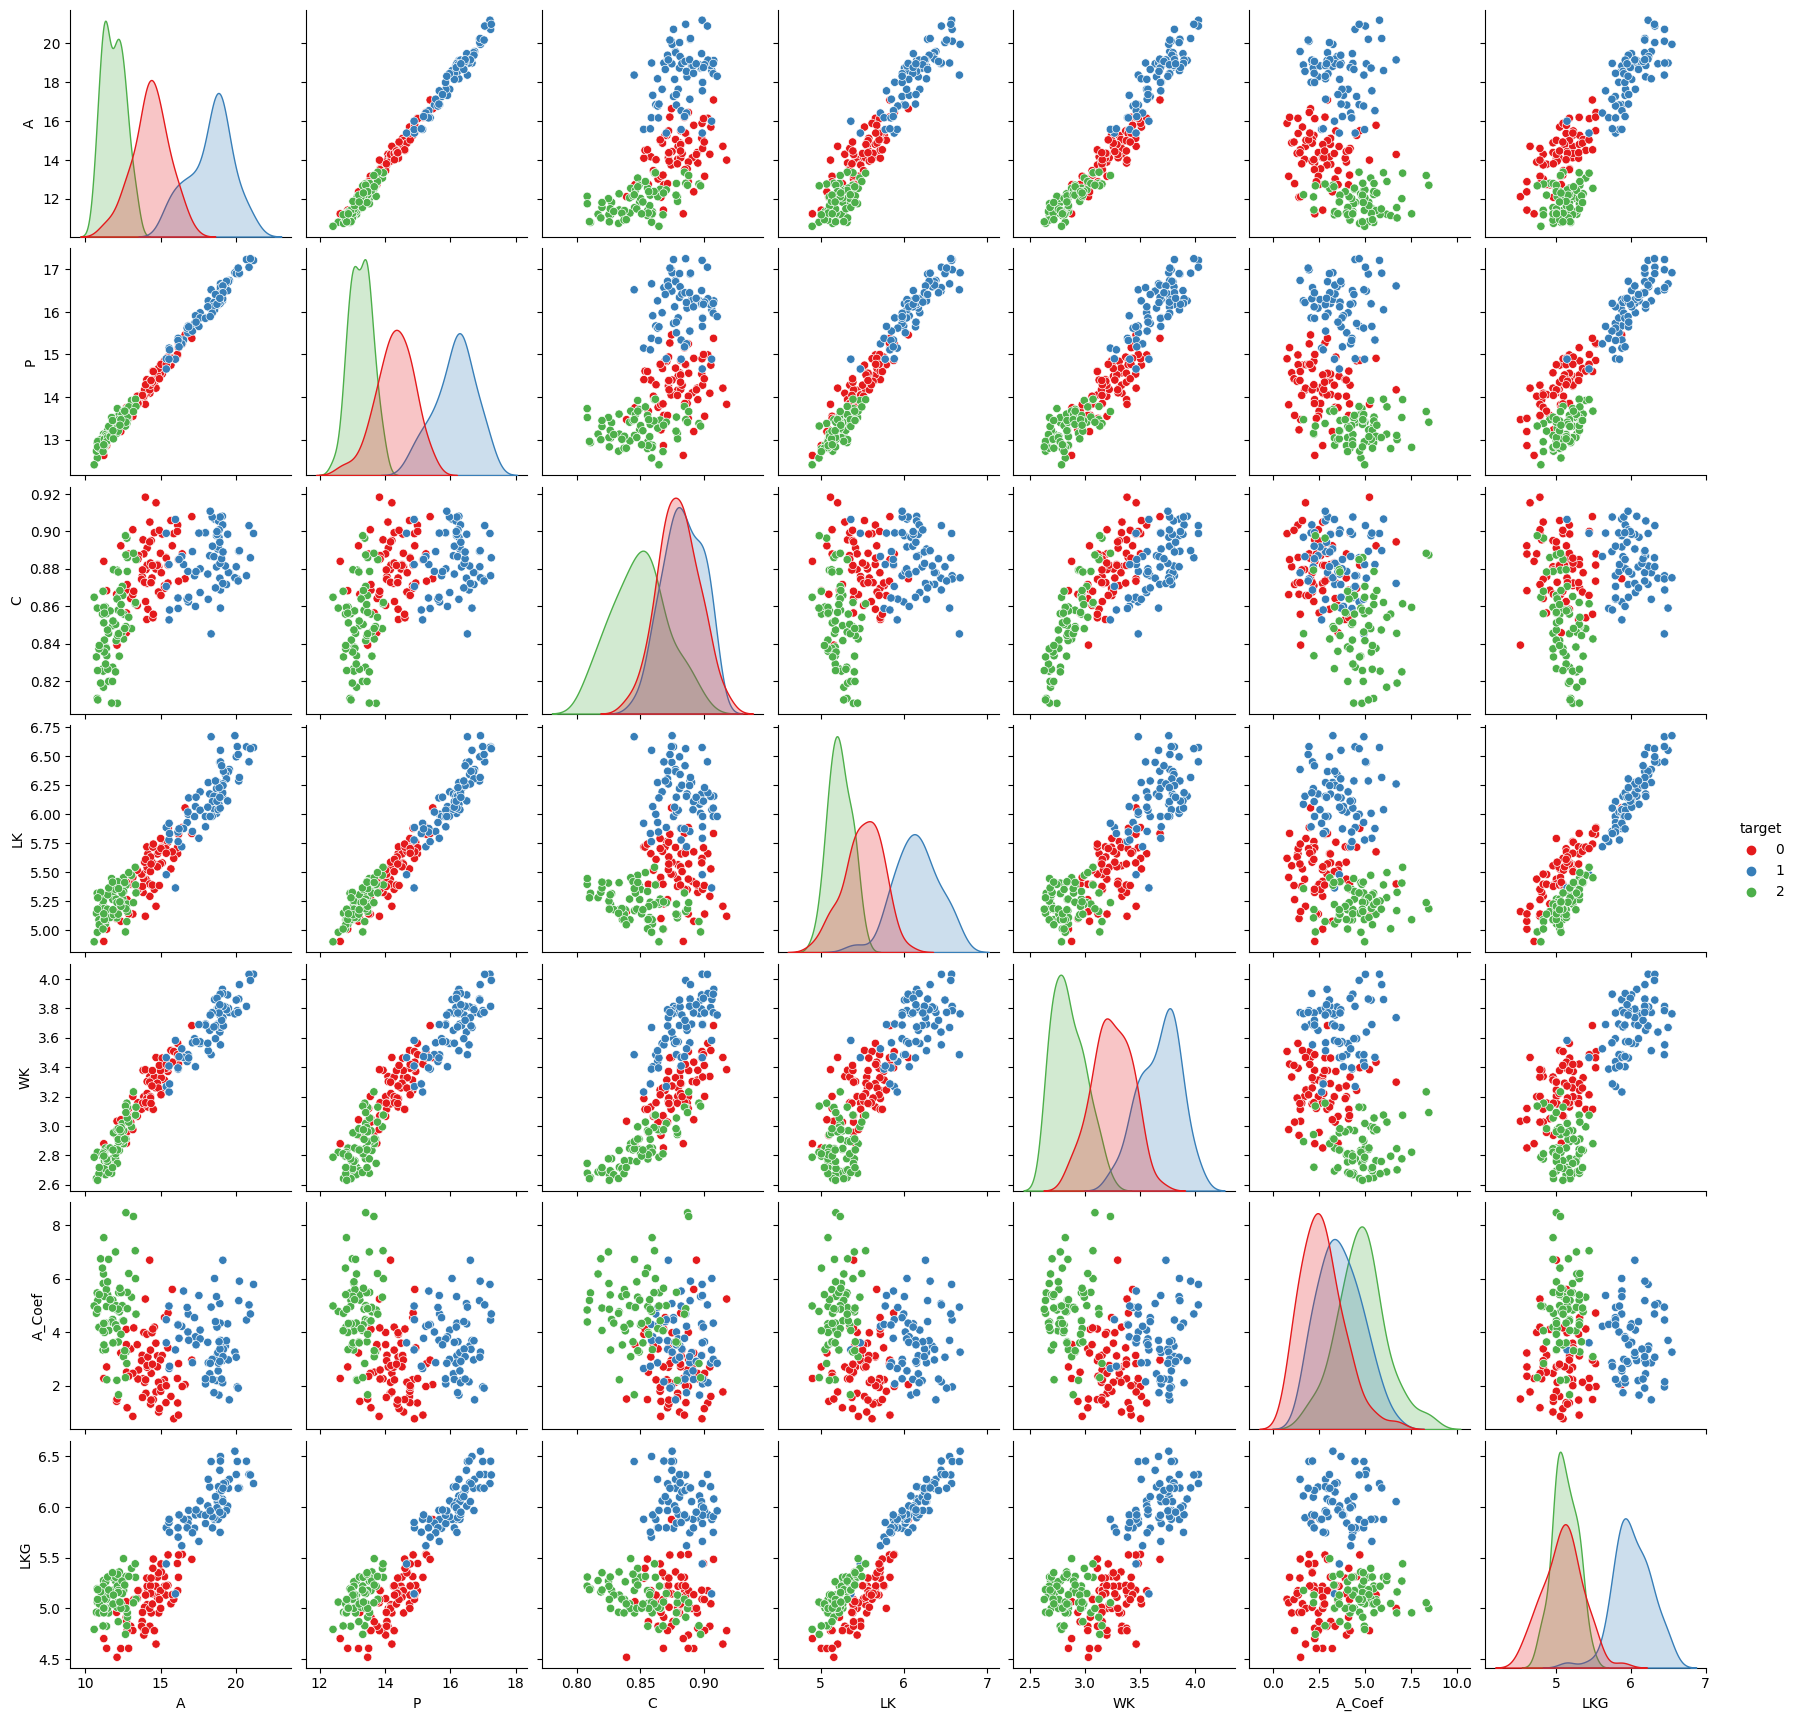

In [ ]:
sbn.pairplot(df, hue = 'target', palette='Set1')
plt.show()

## 2. Thuật toán Cure

In [ ]:
def model_cure_dims(sample, num_clusters): #data 1-nhiều chiều
  cure_instance = cure(sample, num_clusters)
  (ticks, _) = timedcall(cure_instance.process)
  clusters = cure_instance.get_clusters()
  representors = cure_instance.get_representors()
  means = cure_instance.get_means()
  return clusters

In [ ]:
sample = fix_input(data)


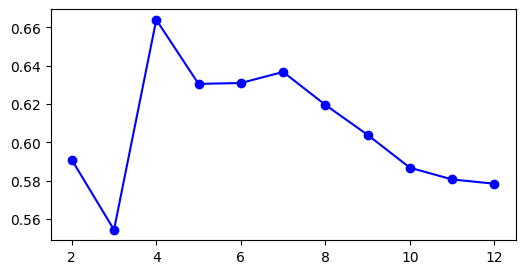

In [ ]:
nbClusters  = range(2, 13)
score = []
for k in nbClusters:
    clusters= model_cure_dims(sample, k)
    score.append(mean(metrics.homogeneity_completeness_v_measure(df['target'], fix_output(clusters))))

plt.figure(figsize = (6, 3))
plt.plot(nbClusters, score, 'bo-')
plt.show()

In [ ]:
# Xây dựng mô hình
cure_instance3 = cure(sample, 3)
cure_instance3.process()
clusters3 = cure_instance3.get_clusters()

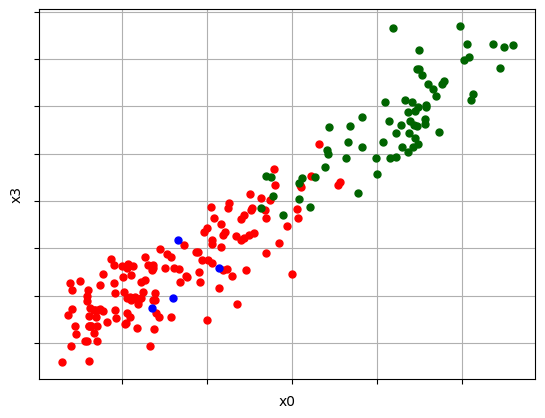

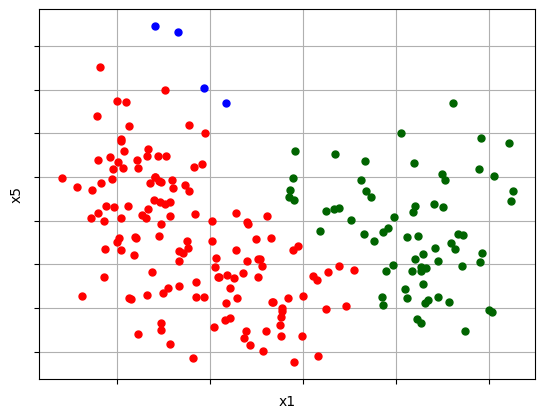

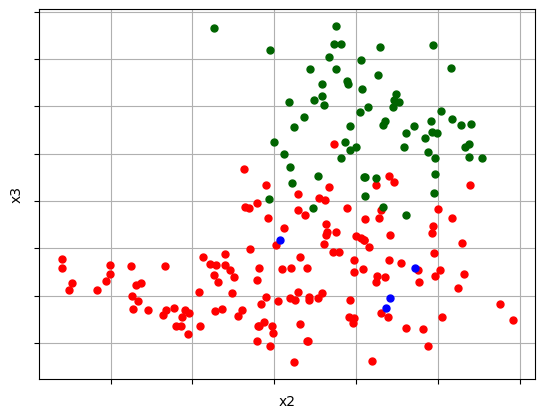

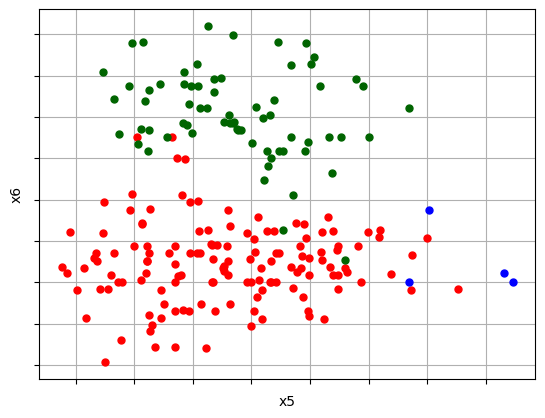

In [ ]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters3, sample,markersize = 10)
for x in [[0, 3], [1, 5],[2,3],[5,6]]:
  visualizer.show(pair_filter=[x])

In [ ]:
# Xây dựng mô hình
cure_instance4 = cure(sample, 4)
cure_instance4.process()
clusters4 = cure_instance4.get_clusters()

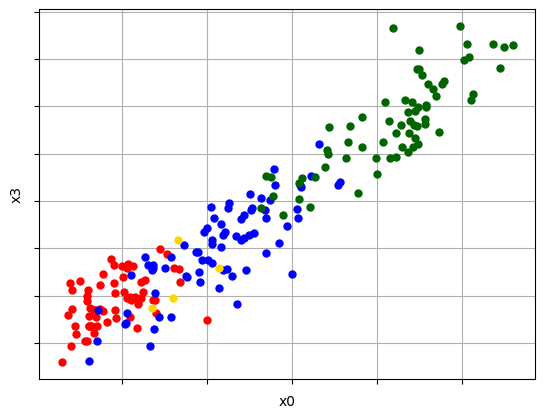

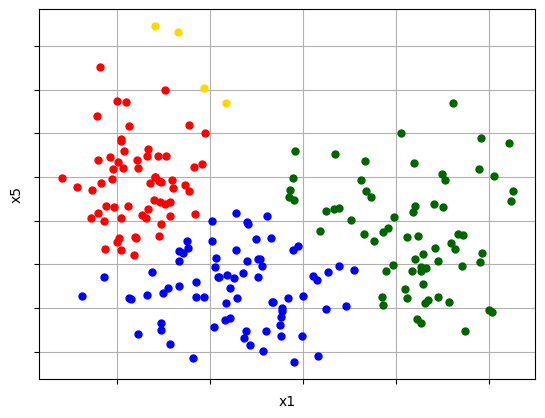

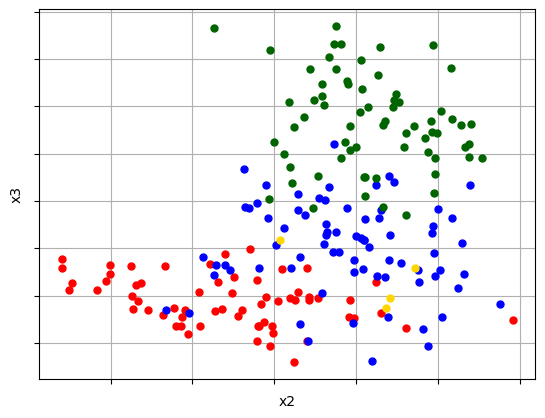

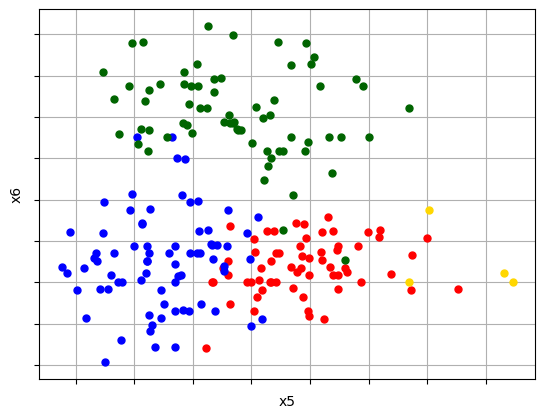

In [ ]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters4, sample,markersize = 10)
for x in [[0, 3], [1, 5],[2,3],[5,6]]:
  visualizer.show(pair_filter=[x])

In [ ]:
# Chỉ số Silhouette
score3 = silhouette_score(data, fix_output(clusters3))
print('Chỉ số silhouette của bộ dữ liệu Seed_Data (k=3): ',score3)
score4 = silhouette_score(data, fix_output(clusters4))
print('Chỉ số silhouette của bộ dữ liệu Seed_Data (k=4): ',score4)

Chỉ số silhouette của bộ dữ liệu Seed_Data (k=3):  0.35154233129992585
Chỉ số silhouette của bộ dữ liệu Seed_Data (k=4):  0.4191295274295642


In [ ]:
# Chỉ số homogeneity, completeness, V-measure
print('Bộ 3 chỉ số homogeneity, completeness, V-measure (k=3)')
print(metrics.homogeneity_completeness_v_measure(df['target'], fix_output(clusters3)))
print('Bộ 3 chỉ số homogeneity, completeness, V-measure (k=4)')
print(metrics.homogeneity_completeness_v_measure(df['target'], fix_output(clusters4)))

Bộ 3 chỉ số homogeneity, completeness, V-measure (k=3)
(0.4442033525885663, 0.6811219759733225, 0.537723016748857)
Bộ 3 chỉ số homogeneity, completeness, V-measure (k=4)
(0.6849314802234069, 0.6434236813411636, 0.663529072981849)


In [ ]:
# Thời gian thực hiện thuật toán
(ticks3, _) = timedcall(cure_instance3.process)
print("Sample: Seed_Data (k=3) ", "\tExecution time: ", ticks3, "\n")
(ticks4, _) = timedcall(cure_instance4.process)
print("Sample: Seed_Data (k=4) ", "\tExecution time: ", ticks4, "\n")

Sample: Seed_Data (k=3)  	Execution time:  0.027665081000009195 

Sample: Seed_Data (k=4)  	Execution time:  0.025733791999982714 



## 3. Các phương pháp truyền thống

### Kmeans

Runtime: 0.028294801712036133 seconds
homogeneity: 0.6934607041029826
completeness: 0.696395547296022
V_measure: 0.6949250270680578


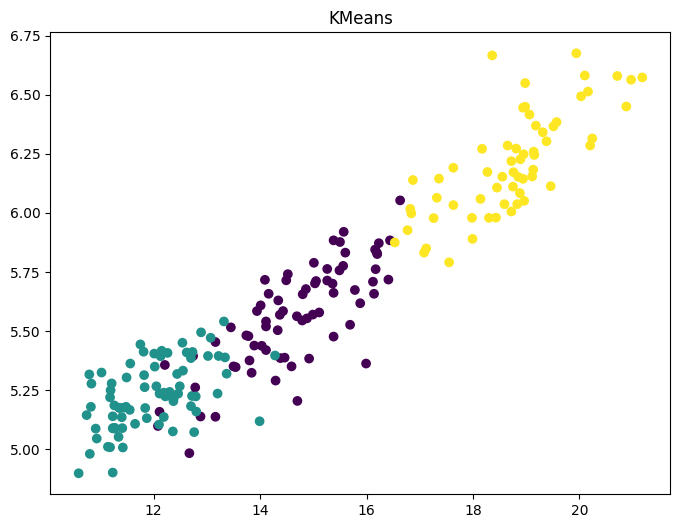

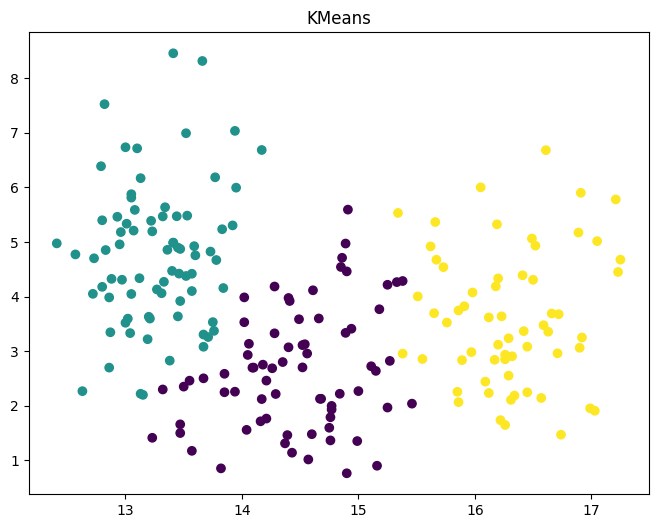

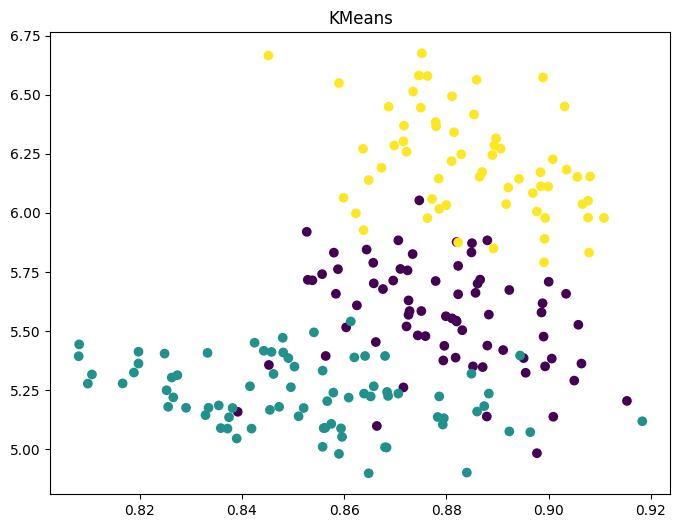

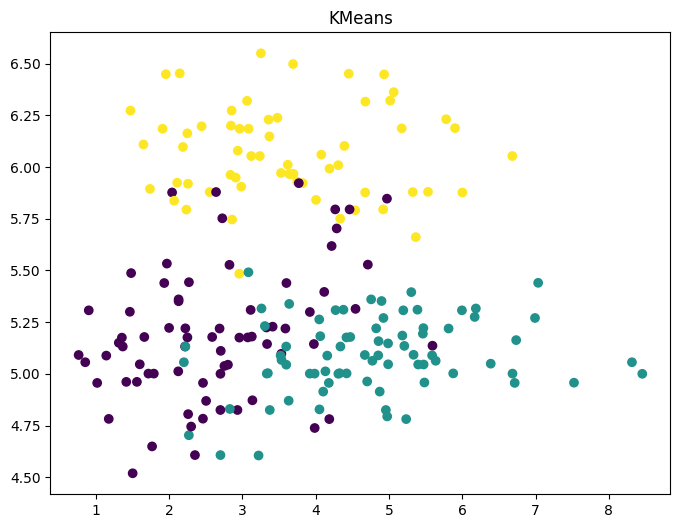

In [ ]:
X = data
y = df['target']
start_time = time.time()

kmean = KMeans(3).fit(X)

y_pred = kmean.predict(X)

end_time = time.time()

print("Runtime:", end_time - start_time, "seconds")

homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
V_measure = v_measure_score(y, y_pred)
print("homogeneity:", homogeneity)
print("completeness:", completeness)
print("V_measure:", V_measure)

df['tg'] = y_pred
for x,y in [['A','LK'],['P','A_Coef'],['C','LK'],['A_Coef','LKG']]:
  plt.figure(figsize=(8, 6))
  plt.scatter(df[x], df[y], c=df.tg)
  plt.title('KMeans')
  plt.show()




### HAC

Runtime: 0.017954349517822266 seconds
homogeneity: 0.7266916689197686
completeness: 0.7352022993399162
V_measure: 0.7309222111874399


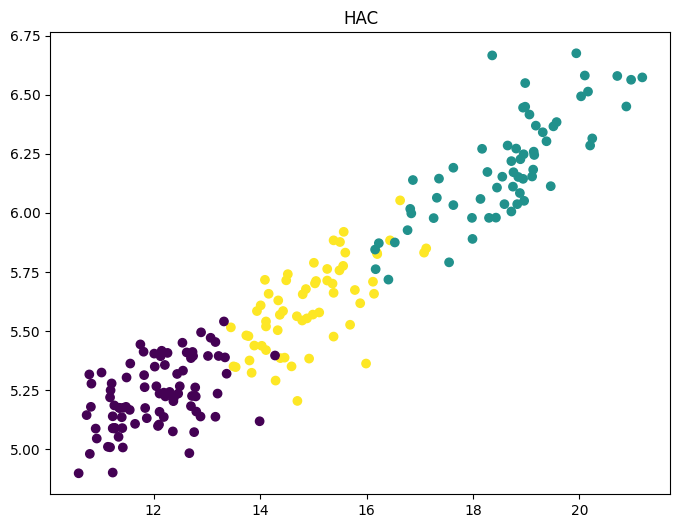

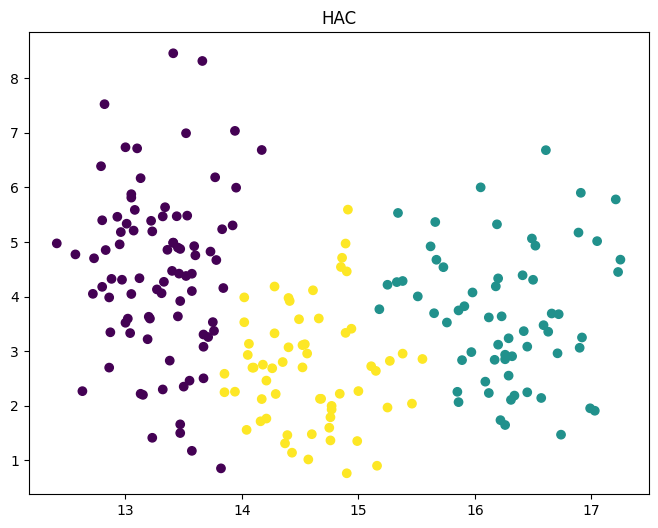

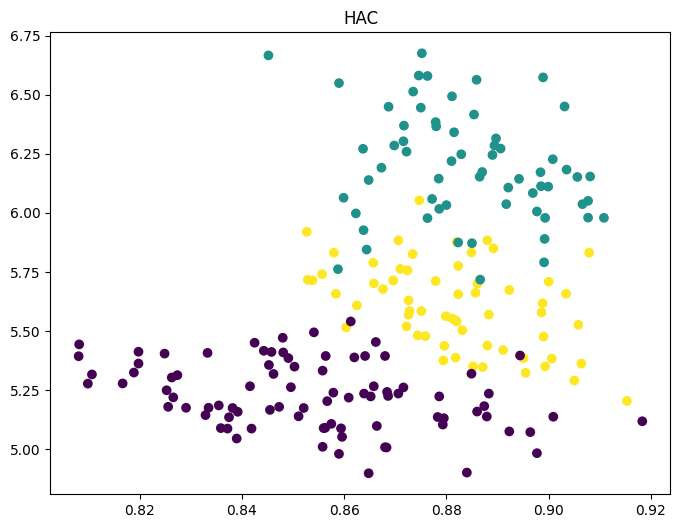

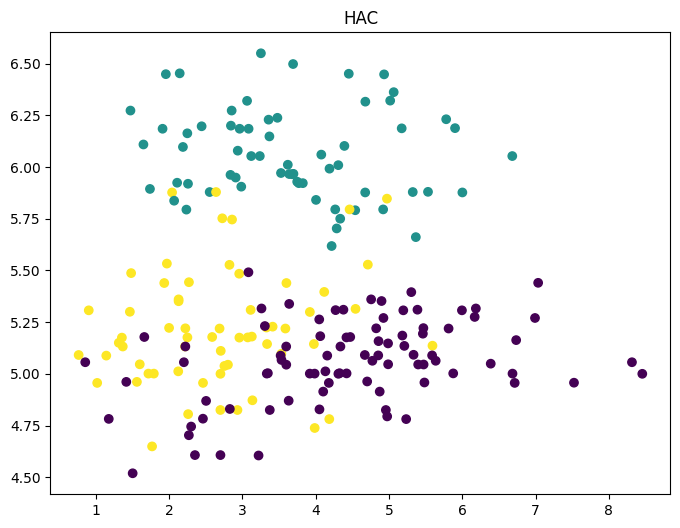

In [ ]:

X = data
y = df['target']
start_time = time.time()

hac = AgglomerativeClustering(3)
y_pred = hac.fit_predict(X)

end_time = time.time()

print("Runtime:", end_time - start_time, "seconds")

homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
V_measure = v_measure_score(y, y_pred)
print("homogeneity:", homogeneity)
print("completeness:", completeness)
print("V_measure:", V_measure)

df['tg'] = y_pred
for x,y in [['A','LK'],['P','A_Coef'],['C','LK'],['A_Coef','LKG']]:
  plt.figure(figsize=(8, 6))
  plt.scatter(df[x], df[y], c=df.tg)
  plt.title('HAC')
  plt.show()




## 4. Các phương pháp khác

### BIRCH

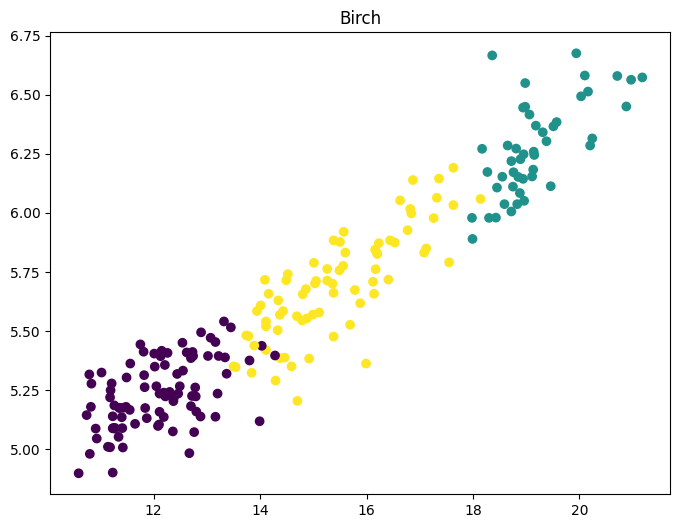

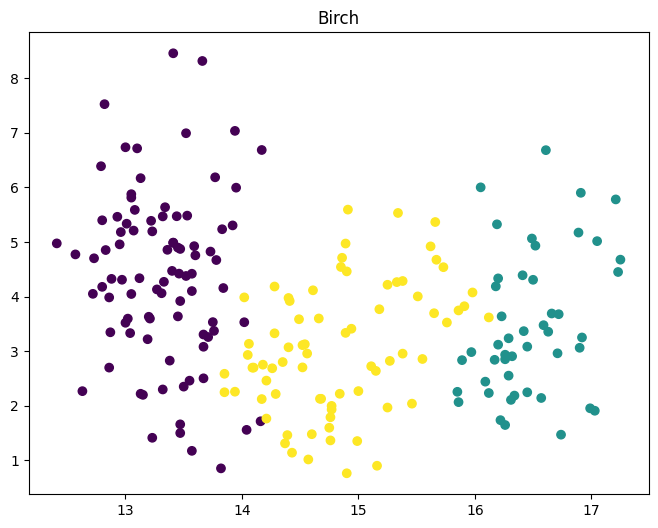

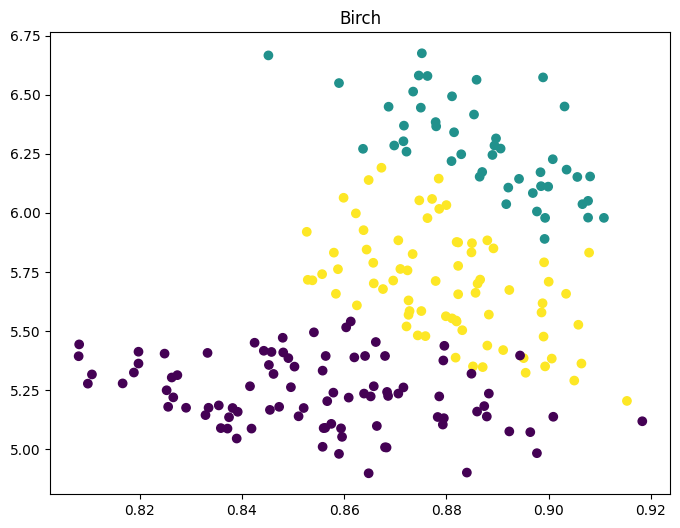

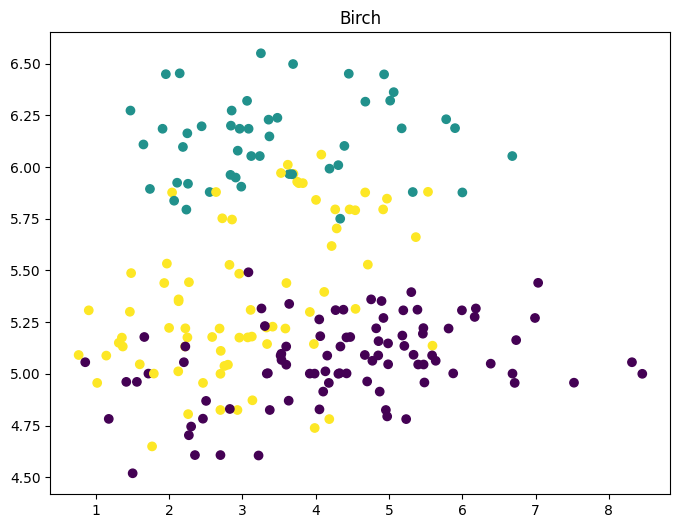

In [ ]:
X = df.drop('target', axis = 1)
y = df['target']

start_time = time.time()

birch_model = Birch(n_clusters=3)
birch_labels = birch_model.fit_predict(X)

end_time = time.time()
execution_time = end_time - start_time

homogeneity = homogeneity_score(y, birch_labels)
completeness = completeness_score(y, birch_labels)
V_measure = v_measure_score(y, birch_labels)

df['tg'] = birch_labels
for x,y in [['A','LK'],['P','A_Coef'],['C','LK'],['A_Coef','LKG']]:

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x], df[y], c=df.tg)
  plt.title('Birch')
  plt.show()


In [ ]:
print("Execution Time:", execution_time, "seconds")
print(f"Homogeneity: {homogeneity:.3f}")
print(f"Completeness: {completeness:.3f}")
print(f"V-measure: {V_measure:.3f}")

Execution Time: 0.013014554977416992 seconds
Homogeneity: 0.601
Completeness: 0.619
V-measure: 0.610


### DBSCAN

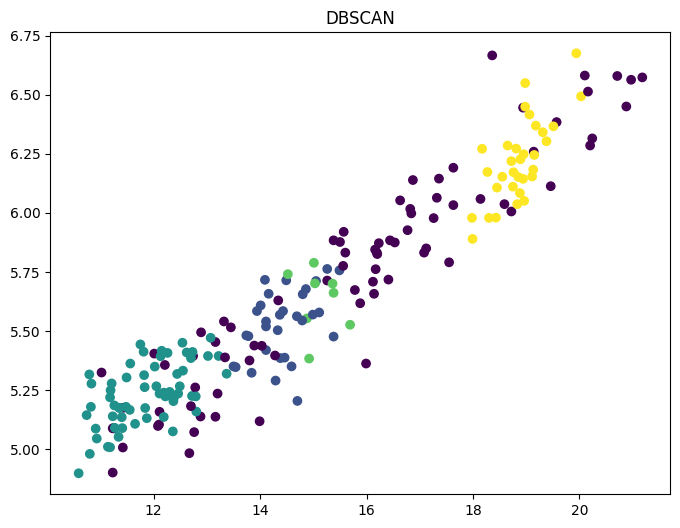

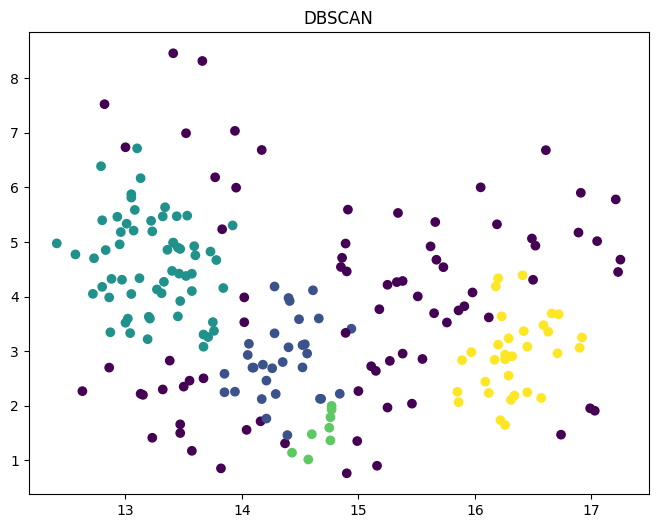

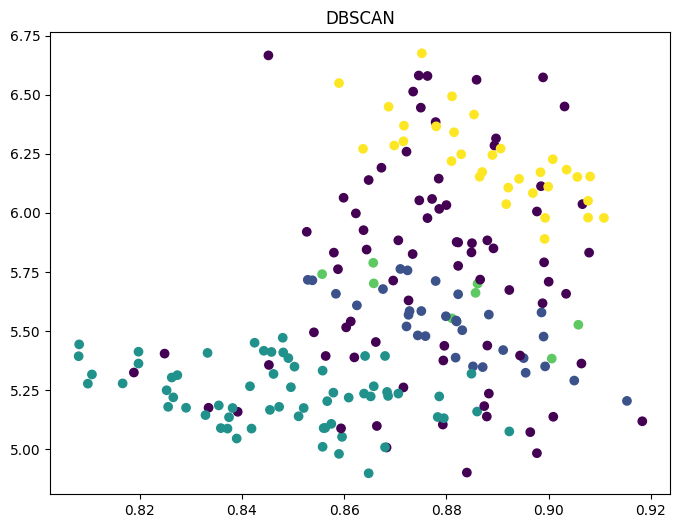

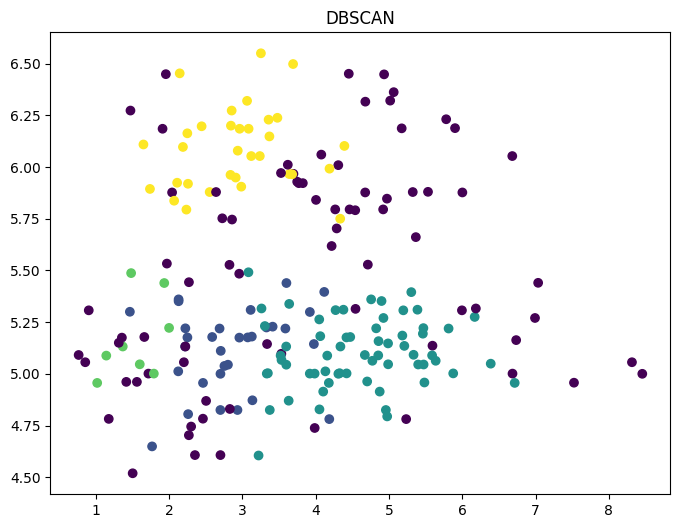

In [ ]:
X = df.drop('target', axis = 1)
y = df['target']
start_time = time.time()

dbscan_model = DBSCAN(eps=0.9, min_samples=12)
dbscan_labels = dbscan_model.fit_predict(X)

end_time = time.time()
execution_time = end_time - start_time

homogeneity = homogeneity_score(y, birch_labels)
completeness = completeness_score(y, birch_labels)
V_measure = v_measure_score(y, birch_labels)

df['tg'] = dbscan_labels
for x,y in [['A','LK'],['P','A_Coef'],['C','LK'],['A_Coef','LKG']]:

  plt.figure(figsize=(8, 6))
  plt.scatter(df[x], df[y], c=df.tg)
  plt.title('DBSCAN')
  plt.show()

In [ ]:
print("Execution Time:", execution_time, "seconds")
print(f"Homogeneity: {homogeneity:.3f}")
print(f"Completeness: {completeness:.3f}")
print(f"V-measure: {V_measure:.3f}")

Execution Time: 0.006442546844482422 seconds
Homogeneity: 0.601
Completeness: 0.619
V-measure: 0.610
